# Poincaré Sections

This notebook forced-damped-Pendulum. This follows strongly the chapter 3 of [[1]](https://www.pearson.ch/HigherEducation/Pearson/EAN/9780131469907/Computational-Physics).

The differential equation we want to solve, is:

$$
\frac{d^2\theta}{dt^2}=-\frac{g}{l}\sin(\theta)-\gamma\frac{d\theta}{dt}+F_f\sin(\omega_ft),
$$

where $g$ is the gravity, $l$ is the length of the pendulim, $F_f$ and $\omega_f$ are the stregnth and frequency of the external force.

---

First, we import the libraries,

In [1]:
import numpy as np
import matplotlib.pylab as plt
%config InlineBackend.figure_format='retina'

Then, we evaluate the integration of the motion equations by writing the equation as a set of 1st order differential equations

$$
\frac{d\omega}{dt}=-\frac{g}{l}\sin(\theta)-\gamma\frac{d\theta}{dt}+F_f\sin(\omega_ft),
$$
and
$$
\frac{d\theta}{dt}=\omega.
$$

---
The method used is _modified Euler_ or _Euler Cromer_ which is a second order symplectic method, is done by integrating

```
omega[i+1]=omega[i]+(domega/dt)(omega[i],theta[i],t[i])*dt
theta[i+1]=theta[i]+(dtheta/dt)(omega[i+1],theta[i],t[i])*dt
```
at every timestep.

In [2]:
def integrate(theta1,omega1,t1):
    omega1=np.append(omega1,omega1[-1]+domegadt(theta1[-1],omega1[-1],t1[-1])*dt)
    theta1=np.append(theta1,theta1[-1]+dthetadt(theta1[-1],omega1[-1],t1[-1])*dt)
    t1=np.append(t1,t1[-1]+dt)
    return theta1,omega1,t1

And, we also define the derivatives used to integrate.

In [3]:
def domegadt(theta1,omega1,t1):
    return -(g/l)*np.sin(theta1)-gamma*dthetadt(theta1,omega1,t1)+F_f*np.sin(omega_f*t1)
def dthetadt(theta1,omega1,t1):
    return omega1

Lastly, we define the integration complete, and return the arrays for the angle, frequency and time.

In [4]:
def integration(time_steps,th0,om0,time0,force0):
    global F_f
    F_f=force0
    theta1=np.array([th0])
    omega1=np.array([om0])
    t1=np.array([time0])
    for i in range(time_steps):
        theta1,omega1,t1=integrate(theta1,omega1,t1)
    return theta1,omega1,t1

we define the initial conditions for the code

In [5]:
omega_f=2./3.
g=9.8
l=9.8
gamma=0.5 
dt=0.04
timesteps=10000
theta_ini=0.2
d_theta=0.0001
omega_ini=0.0
t_ini=0.0

We integrate and save all on `arrays`

In [6]:
theta,omega,t=integration(timesteps,theta_ini,omega_ini,t_ini,0.5)

The solutions lead to

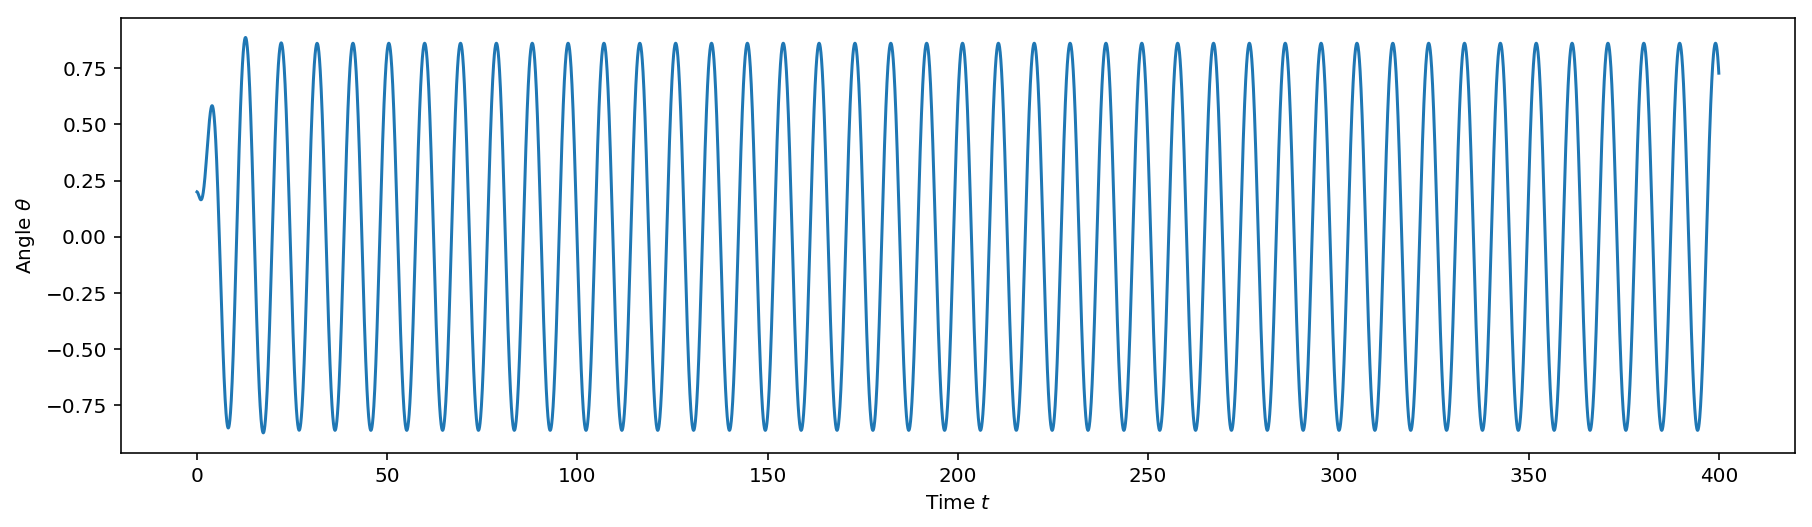

In [7]:
fig=plt.figure(figsize=(15,4))
ax1=fig.add_subplot(111)
ax1.set_ylabel('Angle $\\theta$')
ax1.set_xlabel('Time $t$')
ax1.plot(t,theta)

A slightly different initial condition,

Text(0.5, 0, 'Time $t$')

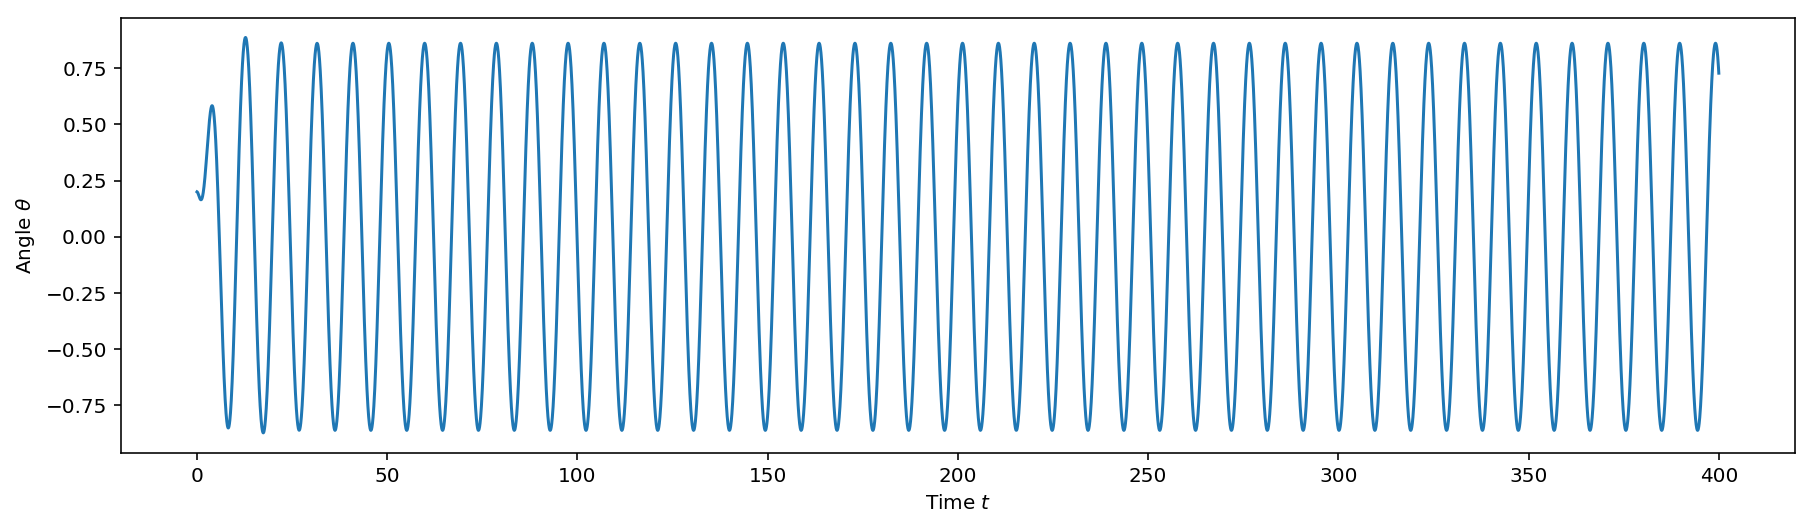

In [8]:
theta2,omega2,t2=integration(timesteps,theta_ini+d_theta,omega_ini,t_ini,0.5)
fig=plt.figure(figsize=(15,4))
ax1=fig.add_subplot(111)
ax1.plot(t2,theta2)
ax1.set_ylabel('Angle $\\theta$')
ax1.set_xlabel('Time $t$')

So, if we plot the difference on time,

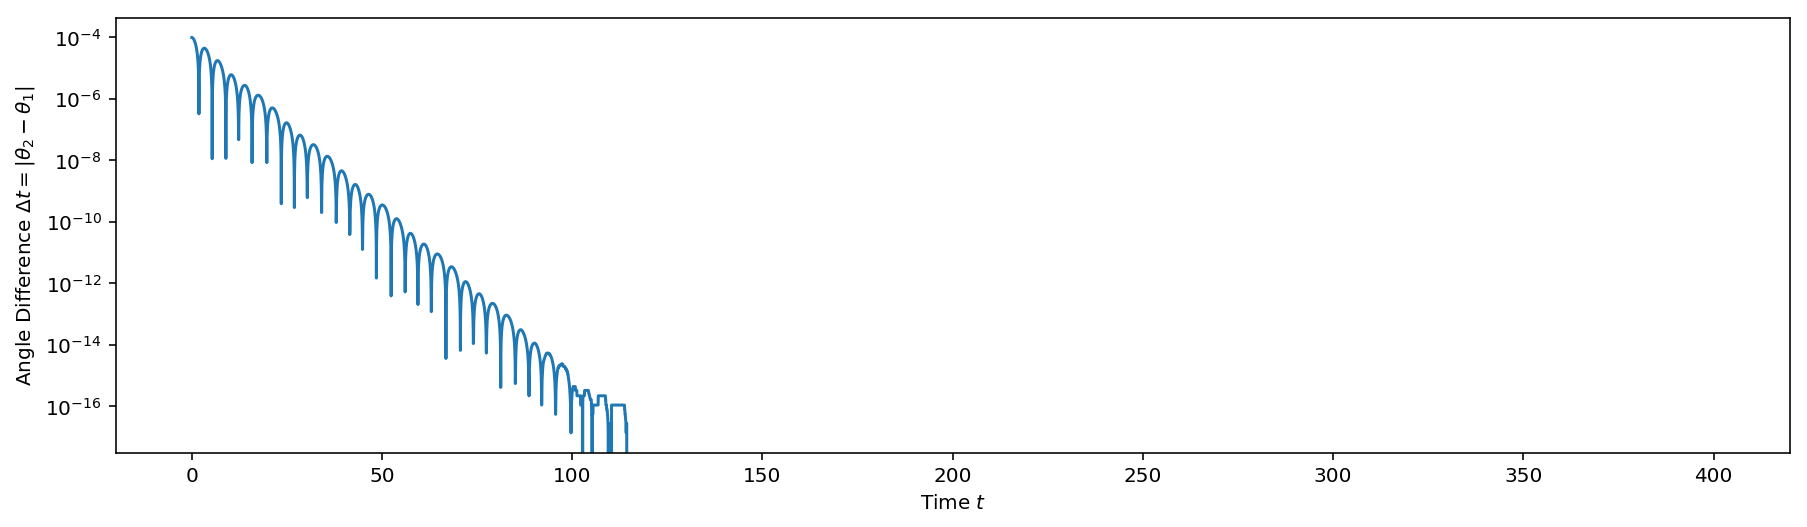

In [9]:
fig=plt.figure(figsize=(15,4))
ax=fig.add_subplot(111)
ax.set_ylabel('Angle Difference $\Delta t = |\\theta_2-\\theta_1|$')
ax.set_xlabel('Time $t$')
ax.plot(t,np.abs(theta2-theta))
ax.set_yscale("log")

But, if we consider a stronger external force, for instance, an amplitud $F_f=1.2$

(0, 100)

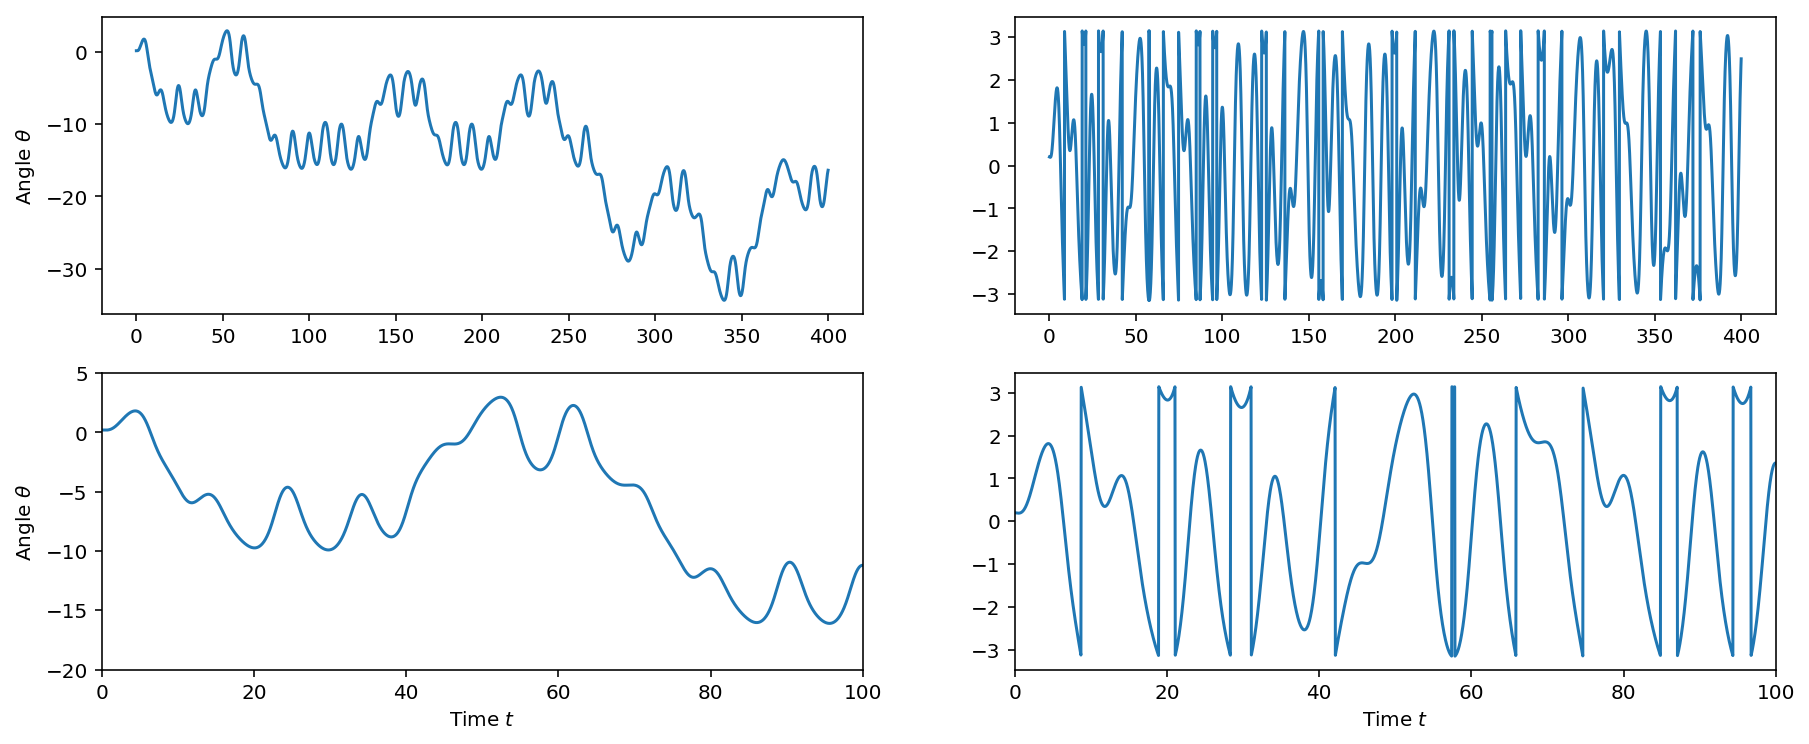

In [10]:
theta3,omega3,t3=integration(timesteps,theta_ini,omega_ini,t_ini,1.2)

fig=plt.figure(figsize=(15,6))
ax1=fig.add_subplot(221)
ax1.plot(t3,theta3)
ax1.set_ylabel('Angle $\\theta$')
ax2=fig.add_subplot(222)
ax2.plot(t3,(theta3+np.pi)%(2.*np.pi)-np.pi)
ax3=fig.add_subplot(223)
ax3.set_ylabel('Angle $\\theta$')
ax3.set_xlabel('Time $t$')
ax3.set_xlim(0,100)
ax3.set_ylim(-20,5)
ax3.plot(t3,theta3)
ax4=fig.add_subplot(224)
ax4.set_xlabel('Time $t$')
ax4.plot(t3,(theta3+np.pi)%(2.*np.pi)-np.pi)
ax4.set_xlim(0,100)

And, a slightly different initial condition,

(0, 100)

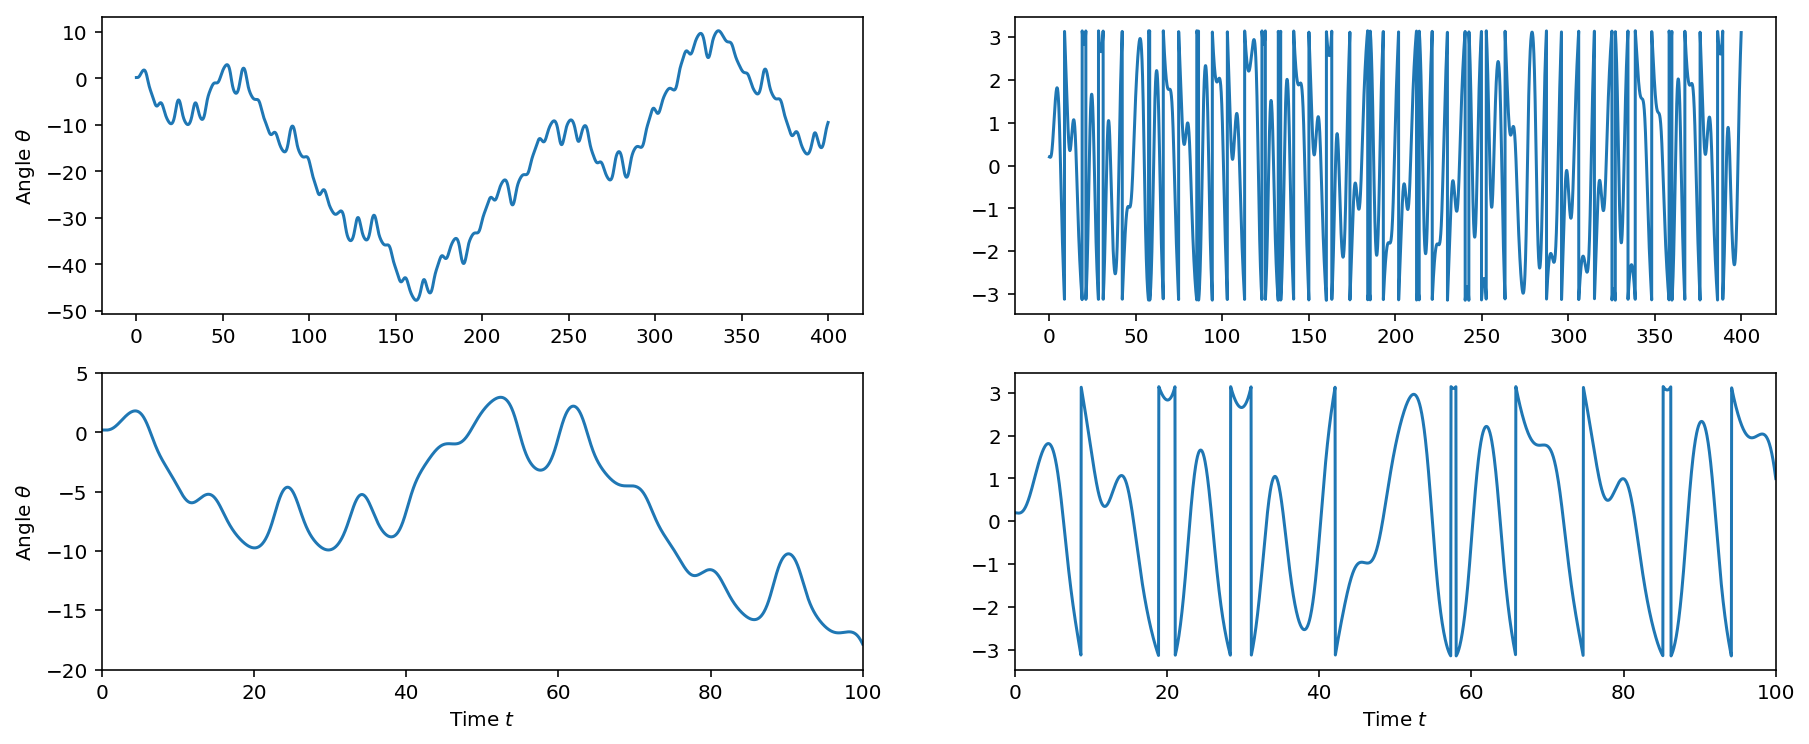

In [11]:
theta4,omega4,t4=integration(timesteps,theta_ini+d_theta,omega_ini,t_ini,1.2)

fig=plt.figure(figsize=(15,6))
ax1=fig.add_subplot(221)
ax1.plot(t4,theta4)
ax1.set_ylabel('Angle $\\theta$')
ax2=fig.add_subplot(222)
ax2.plot(t4,(theta4+np.pi)%(2.*np.pi)-np.pi)
ax3=fig.add_subplot(223)
ax3.set_ylabel('Angle $\\theta$')
ax3.set_xlabel('Time $t$')
ax3.set_xlim(0,100)
ax3.set_ylim(-20,5)
ax3.plot(t4,theta4)
ax4=fig.add_subplot(224)
ax4.set_xlabel('Time $t$')
ax4.plot(t4,(theta4+np.pi)%(2.*np.pi)-np.pi)
ax4.set_xlim(0,100)

The difference on the angles has a very different behavior,

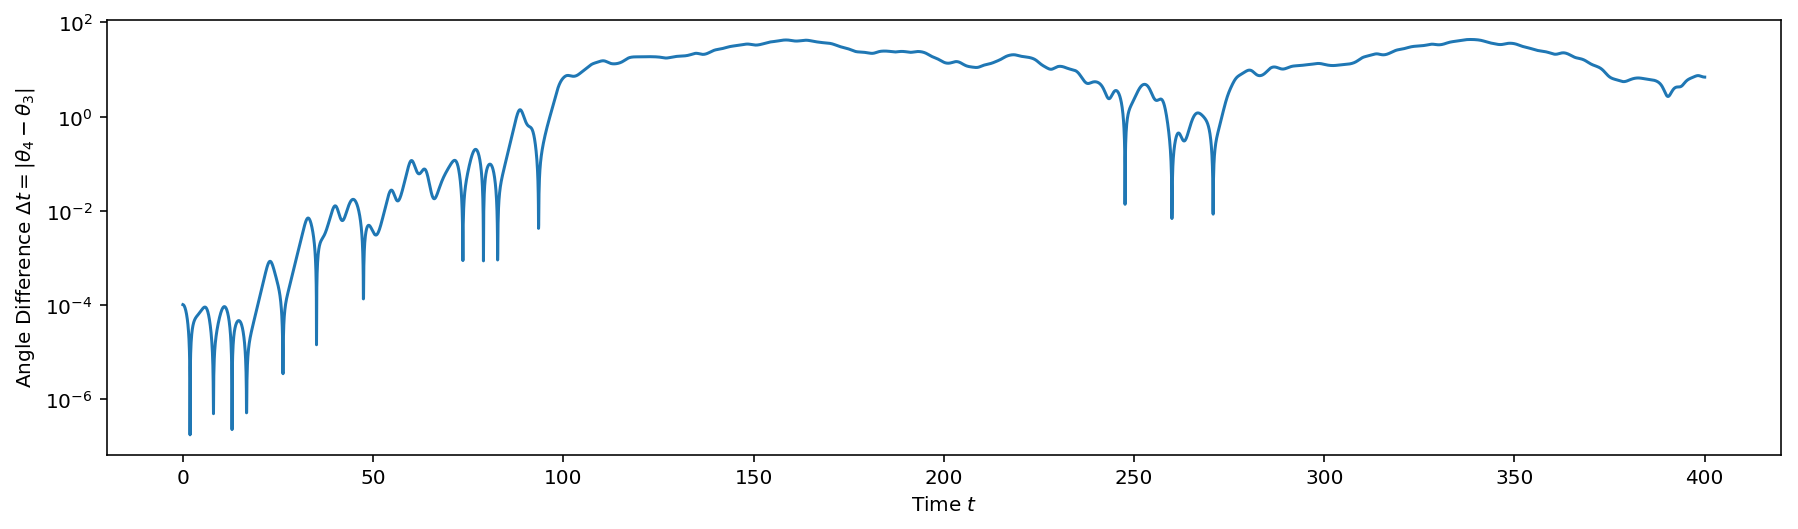

In [12]:
fig=plt.figure(figsize=(15,4))
ax=fig.add_subplot(111)
ax.set_ylabel('Angle Difference $\Delta t = |\\theta_4-\\theta_3|$')
ax.set_xlabel('Time $t$')
ax.plot(t3,np.abs(theta3-theta4))
ax.set_yscale("log")

This is one of the _measurements_ of the chaos on the system

Text(0.5, 0, 'Time $t$')

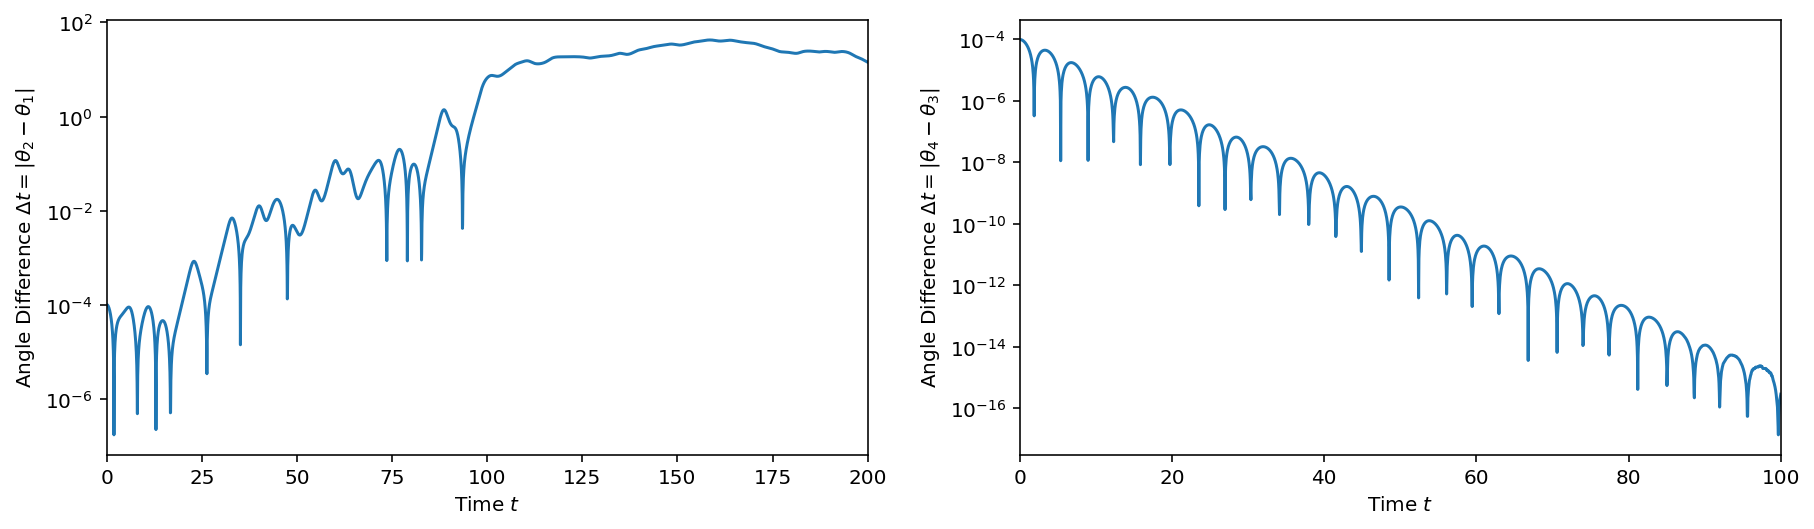

In [13]:
fig=plt.figure(figsize=(15,4))
ax1=fig.add_subplot(121)
ax1.plot(t3,np.abs(theta3-theta4))
ax1.set_yscale("log")
ax1.set_ylabel('Angle Difference $\Delta t = |\\theta_2-\\theta_1|$')
ax1.set_xlabel('Time $t$')
ax1.set_xlim(0,200)
ax2=fig.add_subplot(122)
ax2.plot(t2,np.abs(theta-theta2))
ax2.set_yscale("log")
ax2.set_xlim(0,100)
ax2.set_ylabel('Angle Difference $\Delta t = |\\theta_4-\\theta_3|$')
ax2.set_xlabel('Time $t$')

one can fit this plots to an exponential,

$$\Delta\theta\sim\exp(-\lambda t)$$
where lambda is called the _Lyapunov exponent_. 

## Phase spaces

On both cases, phase space also looks very different,

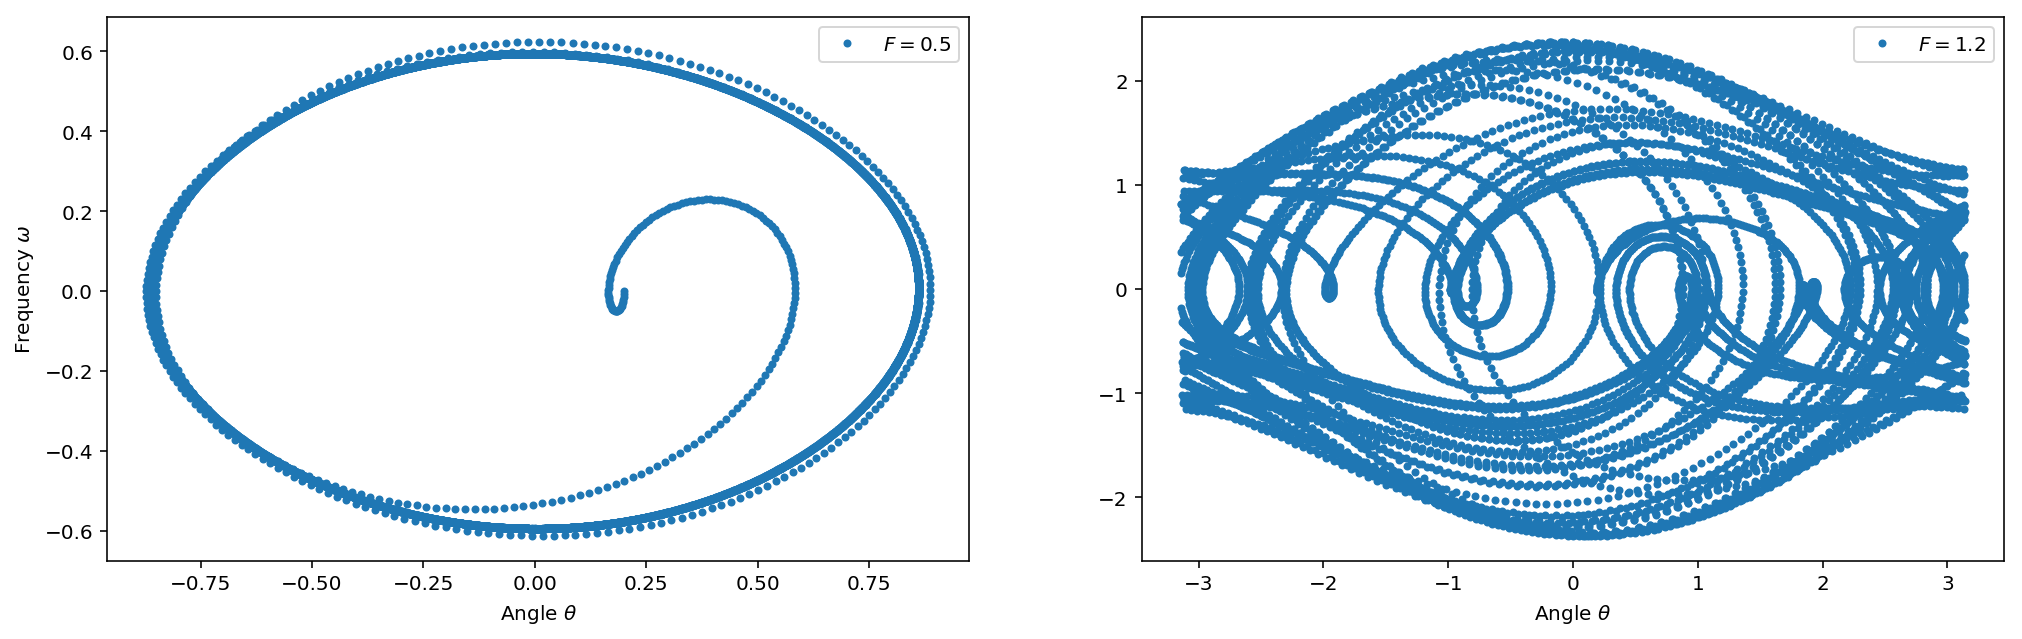

In [14]:
fig=plt.figure(figsize=(17,5))

ax1=fig.add_subplot(121)
ax1.plot((theta+np.pi)%(2.*np.pi)-np.pi,omega,'.',label="$F=0.5$")
ax1.set_ylabel('Frequency $\omega$')
ax1.set_xlabel('Angle $\\theta$')
ax2=fig.add_subplot(122)
ax2.set_xlabel('Angle $\\theta$')
ax2.plot((theta3+np.pi)%(2.*np.pi)-np.pi,omega3,'.',label="$F=1.2$")
ax1.legend()
ax2.legend()

## Poincaré Sections

As we can have different poincaré sections, we are going to consider the case where we are in phase with the external force, so that $\omega_ft=n\pi$ where $n$ is an integer.

To do so, we have to rewrite the integration functions, where we now return values instead of `arrays`

In [15]:
def integrate1(theta1,omega1,t1):
    omega1=omega1+domegadt1(theta1,omega1,t1)*dt
    theta1=theta1+dthetadt1(theta1,omega1,t1)*dt
    t1=t1+dt
    return theta1,omega1,t1

and so the derivatives,

In [16]:
def domegadt1(theta1,omega1,t1):
    return -(g/l)*np.sin(theta1)-gamma*dthetadt(theta1,omega1,t1)+F_f*np.sin(omega_f*t1)
def dthetadt1(theta1,omega1,t1):
    return omega1

Let's consider the chaotic chase,

In [17]:
thetaP=0.2
omegaP=0.
tP=0.0
F_f=1.2

We integrate until we have a certain number of points on the section

In [18]:
omega_p=[]
theta_p=[]
while(len(omega_p)<5000):
    thetaP,omegaP,tP=integrate1(thetaP,omegaP,tP)
    if np.abs(np.abs(omega_f*(tP)/(2.*np.pi))-int(np.abs(omega_f*(tP)/(2.*np.pi))))<0.001: 
        omega_p.append(omegaP)
        theta_p.append(thetaP)

The final plot gets,

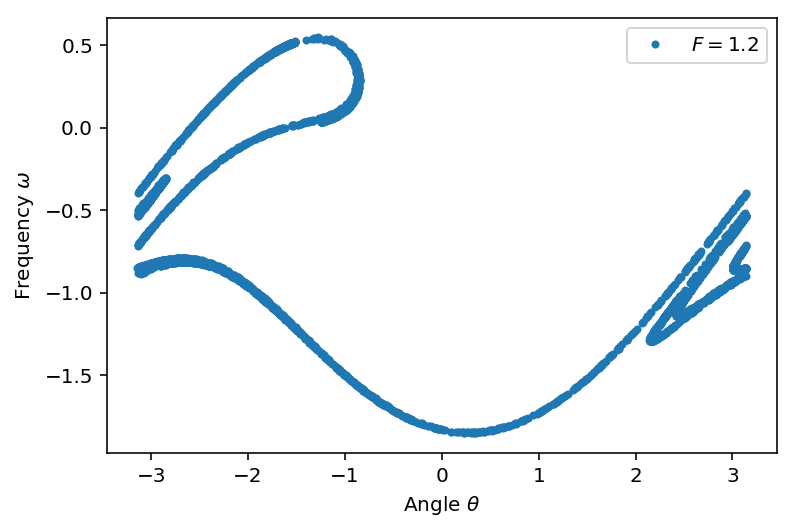

In [19]:
theta_p=np.array(theta_p)
fig=plt.figure()
ax=fig.add_subplot(111)
ax.set_ylabel('Frequency $\omega$')
ax.set_xlabel('Angle $\\theta$')
ax.plot((theta_p+np.pi)%(2.*np.pi)-np.pi,omega_p,'.',label="$F=1.2$")
ax.legend()